# Radiación de fuentes extensas
Este notebook breve calcula un rotor que aparece en forma recurrente en la expansión del campo de radiación de una fuente extensa en coordenadas cartesianas usando SymPy, y luego ilustra la potencia irradiada por unidad de angulo sólido para los primeros términos de la expansión usando NumPy y Matplotlib. Recuerden que cada celda a continuación se debe ejecutar apretando SHIFT+ENTER:

In [1]:
# El código en esta celda asegura que SymPy funcione correctamente en Google colab o en sus computadoras
import os
if "COLAB_GPU" in os.environ:
  from sympy import *
  def custom_latex_printer(expr, **options):
      from IPython.display import Math, HTML
      from google.colab.output._publish import javascript
      url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS_CHTML"
      javascript(content="""window.MathJax = { tex2jax: { inlineMath: [ ['$','$'] ], processEscapes: true } };""")
      javascript(url=url)
      return latex(expr, **options)
  init_printing(use_latex="mathjax", latex_printer=custom_latex_printer)
else:
  from sympy import *
  init_printing()

## Cálculo de rotores en la aproximación de campo de radiación
Usamos SymPy para calcular el rotor de expresiones que aparecen en la expansión del campo de radiación de una fuente extensa en coordenadas cartesianas:

In [2]:
# Importamos el módulo para cálculo vectorial
from sympy.vector import *

# Definimos un sistema de coordenadas cartesiano: r.i,r.j,r.k van a ser los 3 versores, y r.x,r.y,rz las tres coordenadas
r = CoordSys3D('r')

# Definimos variables simbólicas reales
px,py,pz  = symbols("p_x p_y p_z", real=True)
k,omega,t = symbols("k omega t",   real=True)

# Construimos el vector momento dipolar, y el módulo de la coordenada r
p    = px*r.i + py*r.j + pz*r.k
rlen = sqrt(r.x**2 + r.y**2 + r.z**2)

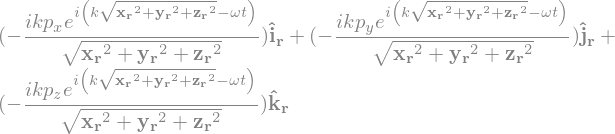

In [3]:
# Definimos el potencial vector A^(0) y lo imprimimos
A0 = -I*k*p*exp(I*(k*rlen-omega*t))/rlen
A0

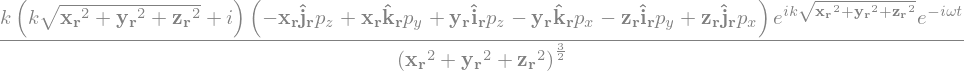

In [4]:
# Calculamos el rotor y lo factorizamos
factor(curl(A0))

## Potencia irradiada para los primeros momentos de la expansión
Usamos NumPy y Matplotlib para graficar la dependencia angular de la potencia irradiada en los primeros términos de la expansión del campo de radiación:

In [5]:
# Importamos NumPy, Matplotlib, y las funciones especiales de SciPy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from scipy.special import *

### Término dipolar eléctrico o magnético

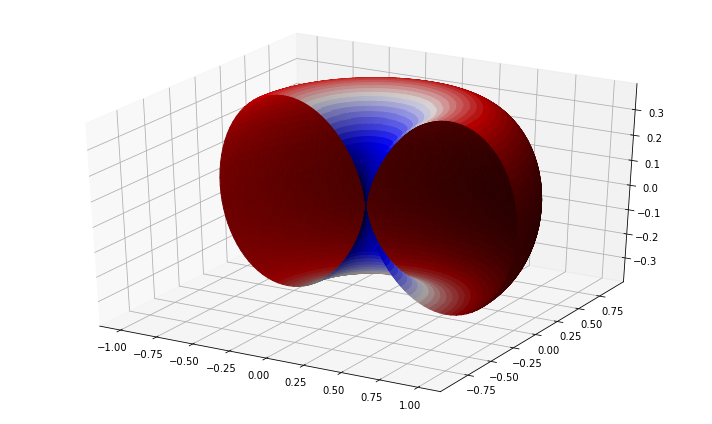

In [6]:
theta = np.linspace(0,np.pi,100)      # linspace genera un vector con 100 valores equiespaciados entre 0 y pi
phi   = np.linspace(0,np.pi,100)      # phi toma valores entre 0 y pi (graficamos media sección)
theta, phi = np.meshgrid(theta, phi)  # meshgrid genera una malla 2D con todos los valores de theta y phi

# Potencia irradiada por unidad de ángulo sólido (miramos solo la dependencia angular)
P = np.sin(theta)**2

# Calculamos las coordenadas cartesianas (x,y,z) de todos los puntos en la malla
x = P*np.sin(theta)*np.cos(phi)
y = P*np.sin(theta)*np.sin(phi)
z = P*np.cos(theta)

# Coloreamos la superficie de la esfera con el valor normalizado de la parte real del armónico esférico
fig = plt.figure(figsize=(10,6))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1, facecolors=cm.seismic(P))
plt.ylim(-np.max(y),np.max(y))
plt.tight_layout()
plt.show()

### Término cuadrupolar eléctrico (diagonal)

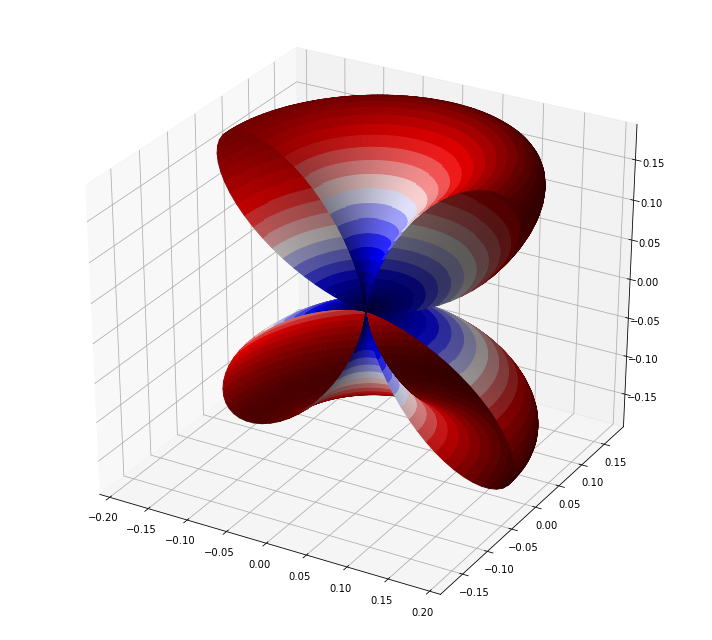

In [7]:
# Potencia irradiada por unidad de ángulo sólido (miramos solo la dependencia angular)
P = np.sin(theta)**2*np.cos(theta)**2

# Calculamos las coordenadas cartesianas (x,y,z) de todos los puntos en la malla
x = P*np.sin(theta)*np.cos(phi)
y = P*np.sin(theta)*np.sin(phi)
z = P*np.cos(theta)

# Coloreamos la superficie de la esfera con el valor normalizado de la parte real del armónico esférico
fig = plt.figure(figsize=(10,9))
ax  = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, rstride=1,cstride=1, facecolors=cm.seismic((P-np.min(P))/(np.max(P)-np.min(P))))
plt.ylim(-np.max(y),np.max(y))
plt.tight_layout()
plt.show()